In [41]:
import tweepy
import pandas as pd     
import numpy as np 
import time
import os
import re

# Plotting and Visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
%matplotlib inline

# TextBlob Imports
from textblob import TextBlob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

# NLTK Imports
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#MAP
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from geopy.geocoders import Nominatim

In [42]:
pwd

'C:\\Users\\Evelyn\\Desktop\\Python DSA\\PythonFundamentos-master\\Cap06\\Notebooks'

In [43]:
consumer_key = '12JU4yJtpxxFUswtBZlKCqHii'
consumer_secret = 'z7rRVqEgDn2CNTJ6kfaMK2YnYmzklFpEvlHqiXSd6EPMyKvKyY'
access_token = '1259747609591402496-8g7bONY1wNHdeKmIb7VdVKtxyO4WJ0'
access_token_secret = 'N5TFkIw8Cy4hIdvqsQ2LD3DS0HBl7Xg1LTJ5TEqHvLuoU'

In [44]:

#Autentication Methods
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [45]:
#Searchin Twitter Timelines
tweets = []
info = []

for tweet in tweepy.Cursor(api.search,
                           q="comercio shopping",
                           tweet_mode='extended',
                           rpp=100,
                           result_type="popular",
                           include_entities=True,
                           lang="pt").items(1500):
    if 'retweeted_status' in dir(tweet):
        aux=tweet.retweeted_status.full_text
    else:
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet)
    info.append(tweet)
    
    file = open("shopping.txt", "a", -1, "utf-8")
    file.write(newtweet+'\n')
    file.close()
    
    time.sleep(150)

In [38]:
#Construction of the dataframe
tweets_df = pd.DataFrame(tweets, columns=['Tweets']) 

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['RTs']    = np.array([tweet.retweet_count for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Geo']    = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates']    = np.array([tweet.coordinates for tweet in info])

tweets_df.to_csv("shopping.csv")

In [39]:
tweets_df

,Tweets,len,ID,Date,Source,Likes,RTs,User Location,Geo,Coordinates


In [18]:
# Top Searched Tweets
fav_max = np.max(tweets_df['Likes'])
rt_max  = np.max(tweets_df['RTs'])

fav = tweets_df[tweets_df.Likes == fav_max].index[0]
rt  = tweets_df[tweets_df.RTs == rt_max].index[0]

# Max FAVs:
print("O tweet com mais curtidas é: \n{}".format(tweets_df['Tweets'][fav]))
print("Número de curtidas: {}".format(fav_max))
print("\n")
# Max RTs:
print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))

O tweet com mais curtidas é: 
Não adianta, msm dps de mostrar q os casos de covid triplicaram em SC após a abertura do comércio, continuo recebendo milhares de replies de pessoas dizendo que tem que deixar aberto SIM.  O Brasil é o Titanic. Já batemos no iceberg. Eu tô desistindo.
Número de curtidas: 67644


O tweet com mais retweet é: 
Já monitoram seu celular sem sua autorização, fecharam avenidas, botaram 50% dos carros em rodízio, soldaram portas do comércio, prenderam senhoras... Qual o próximo passo dessa dupla? https://t.co/aNEIjoBrEU
Número de retweets: 6997


In [27]:
#Source of the Tweets
sources = []
for source in tweets_df['User Location']:
    if source not in sources:
        sources.append(source)

percent = np.zeros(len(sources))

for source in tweets_df['User Location']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

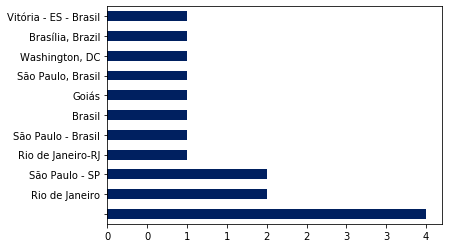

In [28]:
newDF = pd.DataFrame({
 'source':percent,
}, index=sources)

sources_sorted = newDF.sort_values('source',ascending=False)
ax = sources_sorted.source.plot(kind='barh',color='#002060')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))